## Question abordée

Qu'est-ce que c'est la centralité dans le graphe ? Trier par centralité et essayer de trouver des corrélations avec d'autres données.

In [ ]:
import numpy as np
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [ ]:
import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
with open("dataset/musae_FR_features.json") as json_data:
    data_raw = json.load(json_data)


edge_data = pd.read_csv('dataset/musae_FR_edges.csv')
target_data = pd.read_csv('dataset/musae_FR_target.csv')
target_data['mature'] = target_data['mature'].astype(int)

In [ ]:
target_data.head()

In [ ]:
feats=[]
feat_counts=[]
for i in range(len(data_raw)):
    feat_counts+=[len(data_raw[str(i)])]
    feats+=data_raw[str(i)]

print("5 top nodes labels")
print(target_data.head(5).to_markdown())
print()
print("5 last nodes")
print(target_data.tail(5).to_markdown())

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks([0,1])
ax.bar([0,1],list(collections.Counter(target_data.mature).values()));
plt.title("Classes distribution")
plt.show()

plt.hist(feat_counts,bins=20)
plt.title("Number of features per graph distribution")
plt.yscale('log')
plt.show()

plt.hist(feats,bins=50)
plt.title("Features distribution")
plt.show()

In [117]:
G = nx.from_pandas_edgelist(edge_data,source='from',target='to')
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
is_directed = G.is_directed()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Is the graph directed? {is_directed}")

Number of nodes: 6549
Number of edges: 112666
Is the graph directed? False


In [118]:
centrality = nx.degree_centrality(G)

centrality = sorted(centrality.items(), key=lambda item: -1*item[1])
centrality[0], centrality[len(centrality) - 1][1], sum([1 for i in centrality if i[1] == centrality[len(centrality) - 1][1]])

((2161, 0.31154551007941356), 0.00015271838729383018, 247)

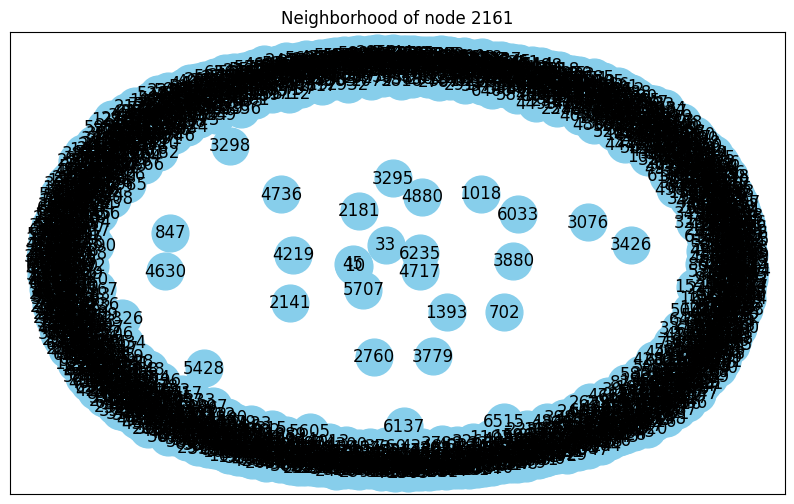

In [119]:
node_index = centrality[0][0]

edge_index = edge_data.to_numpy()
edge_example = edge_index[np.where((edge_index == node_index).any(axis=1))]
node_example = np.unique(edge_example.flatten())

plt.figure(figsize=(10, 6))
G = nx.Graph()
G.add_nodes_from(node_example)
G.add_edges_from(list(zip(edge_example[0], edge_example[1])))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=700, font_size=12)
plt.title("Neighborhood of node " + str(node_index))
plt.show()

Pour connaitre les 10 noeuds les plus connectés:

In [120]:
import heapq

heapq.nlargest(10, dict(centrality), key=dict(centrality).get)

[2161, 771, 5968, 5511, 5543, 6420, 1020, 5310, 2650, 4717]